# Visual Q&A Demo

## Setup
1-Installs required packages   
2-Downloads sample data and a pretrained model.     

In [25]:
using Pkg; Pkg.activate("."); Pkg.instantiate(); #install required packages
include("demosetup.jl") 
include("src/main.jl")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 50.5M  100 50.5M    0     0  1425k      0  0:00:36  0:00:36 --:--:-- 1977k     0  0:00:41  0:00:26  0:00:15 1986k


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
 97 79.9M   97 77.6M    0     0  2023k      0  0:00:40  0:00:39  0:00:01 3968k

Demo setup is completed


100 79.9M  100 79.9M    0     0  2040k      0  0:00:40  0:00:40 --:--:-- 3808k


scalepixel (generic function with 1 method)

## Initialization
1-Loads the sample demo data (image features,questions,vocabulary).   
    * w2i : words to one-hot index   : w2i["cube"] = 30  
    * a2i : answer to one-hot index  : a2i["gray"] = 8
    * i2w : one-hot index to words   : i2w[2] = "Are"   
    * i2a : one-hot index to answers : i2a[5] = "large"   
2-Loads the pretrained model, and its hyper-parameters `o`.     

In [32]:
feats,qstsns,(w2i,a2i,i2w,i2a) = loadDemoData("data/demo/");
_,Mrun,o = loadmodel("models/macnet.jld2";onlywrun=true);
global atype = typeof(params(Mrun)[1].value) <: Array ? Array{Float32} : KnetArray{Float32}

Loading demo features ...
Loading demo questions ...
Loading dictionaries ...


Array{Float32,N} where N

## Sample Data
1-Randomly selects (question,image) pair from the sample data   
2-Make predictions for the question and checks whether the prediction is correct   

In [28]:
rnd        = rand(1:length(qstsns))
inst       = qstsns[rnd]
feat       = atype(feats[:,:,:,rnd:rnd])
question   = Array{Int}(inst[2])
answer     = inst[3];
family     = inst[4];
results,prediction = singlerun(Mrun,feat,question;p=o[:p],selfattn=o[:selfattn],gating=o[:gating]);
answer==prediction[1]

true

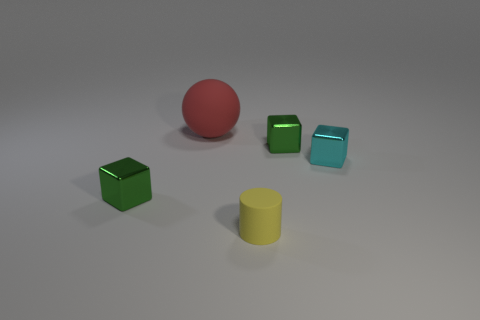

In [29]:
img = load("data/demo/CLEVR_v1.0/images/val/$(inst[1])")

In [22]:
textq  = i2w[question];
println("Question: ",join(textq," "))
texta  = i2a[answer];
println("Answer: $(texta)\nPrediction: $(i2a[prediction]) ")

Question: What size is the shiny block that is both left of the tiny cyan object and on the right side of the yellow matte object ?
Answer: small
Prediction: small 


## User Data
You can enter your own question about the image and test whether the prediction is correct

In [23]:
userinput = readline(stdin)
words = split(userinput) # tokenize(userinput)
question = [get!(w2i,wr,1) for wr in words]
results,prediction = singlerun(Mrun,feat,question;p=o[:p],selfattn=o[:selfattn],gating=o[:gating]);
println("Question: $(join(i2w[question]," "))")
println("Prediction: $(i2a[prediction])")

stdin> What size is the shiny block that is both left of the tiny cyan object and on the right side of the yellow matte object ?
Question: What size is the shiny block that is both left of the tiny cyan object and on the right side of the yellow matte object ?
Prediction: small


## Visualize
`visualize` function visualizes attention maps for each time step of the mac network

Top-3 Attended Words:
("of", "36.54%")
("left", "35.80%")
("both", "7.45%")
Image Attention Map: 


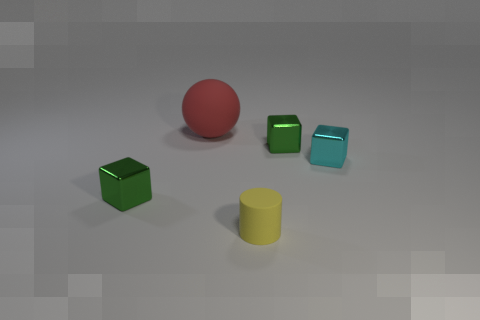

Top-3 Attended Words:
("cyan", "72.66%")
("tiny", "20.15%")
("object", "3.95%")
Image Attention Map: 


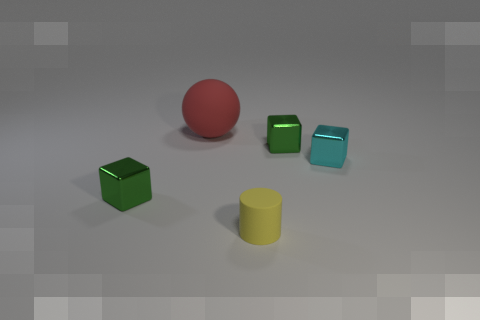

Top-3 Attended Words:
("cyan", "54.71%")
("tiny", "18.19%")
("object", "12.34%")
Image Attention Map: 


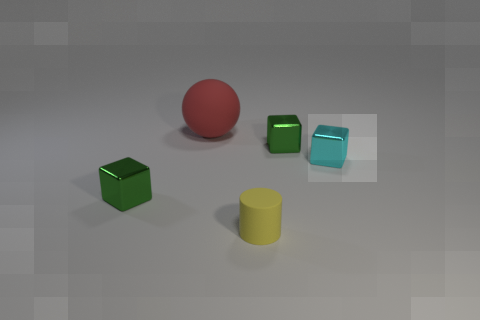

Top-3 Attended Words:
("cyan", "73.99%")
("tiny", "11.26%")
("object", "11.19%")
Image Attention Map: 


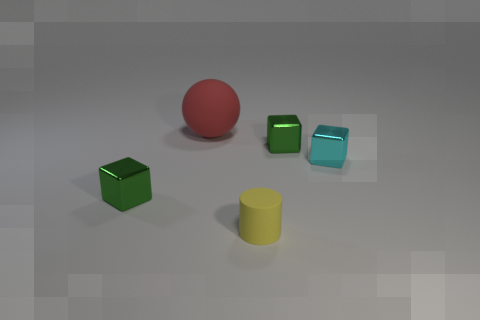

Top-3 Attended Words:
("yellow", "51.80%")
("matte", "20.81%")
("object", "12.64%")
Image Attention Map: 


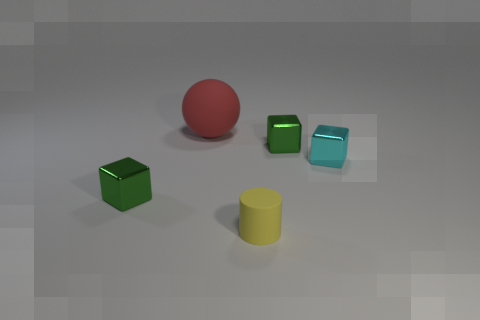

Top-3 Attended Words:
("yellow", "54.24%")
("matte", "17.83%")
("object", "10.75%")
Image Attention Map: 


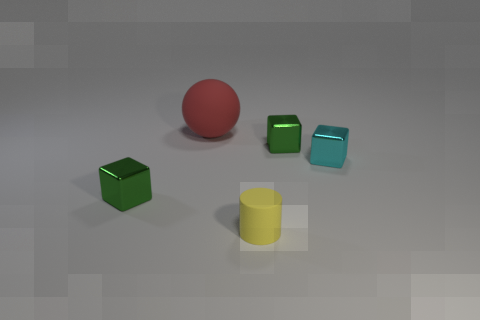

Top-3 Attended Words:
("cyan", "77.45%")
("tiny", "10.07%")
("object", "9.48%")
Image Attention Map: 


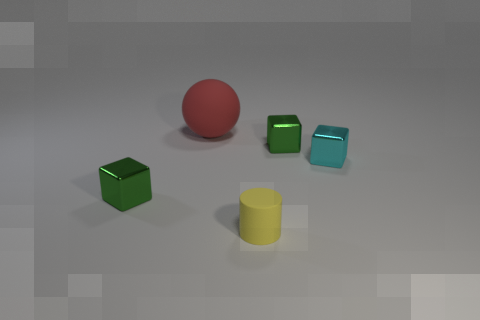

Top-3 Attended Words:
("the", "44.14%")
("shiny", "24.10%")
("?", "9.72%")
Image Attention Map: 


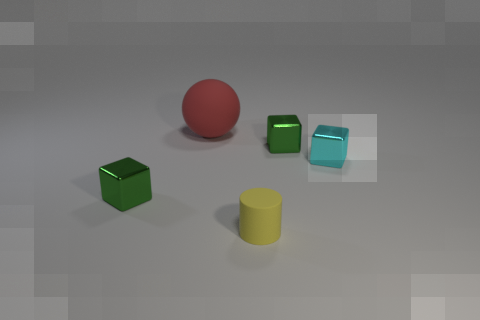

Top-3 Attended Words:
("shiny", "38.76%")
("block", "17.01%")
("the", "12.51%")
Image Attention Map: 


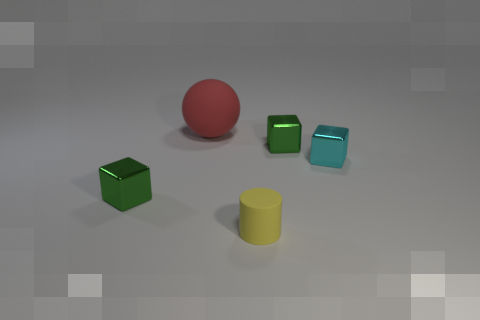

Top-3 Attended Words:
("shiny", "47.43%")
("block", "21.05%")
("and", "9.93%")
Image Attention Map: 


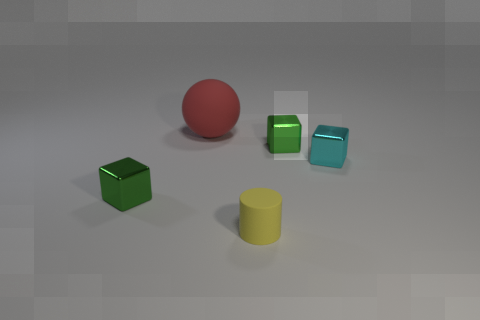

Top-3 Attended Words:
("shiny", "44.62%")
("block", "27.54%")
("and", "6.21%")
Image Attention Map: 


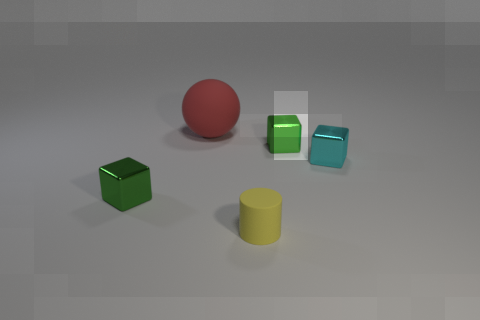

Top-3 Attended Words:
("shiny", "19.81%")
("?", "11.28%")
("the", "11.03%")
Image Attention Map: 


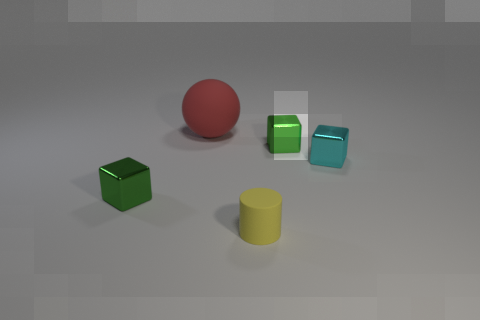

In [24]:
visualize(img,results;p=o[:p])